---
Authorship: Miriam

---

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# H1N1

In [25]:
#load data
features = pd.read_csv(os.path.join(os.getcwd(), 'training_set_features.csv'))
labels = pd.read_csv(os.path.join(os.getcwd(), 'training_set_labels.csv'))

features.set_index('respondent_id', inplace=True)

merged_df = features.join(labels)
num_merged_df = merged_df.loc[:, merged_df.dtypes != 'object'].copy()
rel_h1n1 = num_merged_df.drop(['respondent_id', 'seasonal_vaccine'], axis=1)
#rel_h1n1 = merged_df.drop(['respondent_id', 'seasonal_vaccine'], axis=1)


rel_h1n1= rel_h1n1.fillna(0) #filling all NaNs with 0


#split train, test data:
train, test = train_test_split(rel_h1n1, test_size=0.25)

In [26]:
#Select features for Training (all except labels)
featureList=list(train)[:-1]
descriptor_columns=featureList #all collumns
X_train=train[descriptor_columns].values.astype(np.float)
y_train=train['h1n1_vaccine'].values.astype(np.float)
X_test=test[descriptor_columns].values.astype(np.float)
y_test=test['h1n1_vaccine'].values.astype(np.float)


#Scaling the descriptors:
X_scaler=StandardScaler() 
X_train_scaled=X_scaler.fit_transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

### Feature selection .............TODO: Parameter Tuning

Train a Random Forest Regressor and plot those feature importances.

Train score: 0.8911
Test score: 0.2699


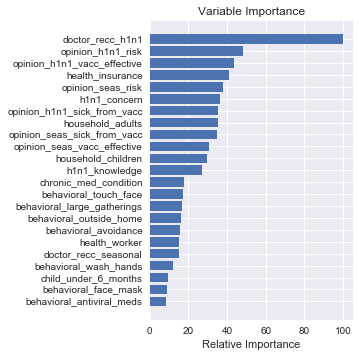

In [27]:
# Fit regression model

clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train_scaled, y_train)
train_score=clf.score(X_train_scaled,y_train)
test_score=clf.score(X_test_scaled,y_test)
print("Train score: %.4f" % train_score)
print("Test score: %.4f" % test_score)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(featureList)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.savefig(os.path.join(os.getcwd(), 'Random-Forrest_Feature-Selection_H1N1.png'), bbox_inches='tight')
plt.show()

# Seasonal

In [28]:
features = pd.read_csv(os.path.join(os.getcwd(), 'training_set_features.csv'))
labels = pd.read_csv(os.path.join(os.getcwd(), 'training_set_labels.csv'))


features.set_index('respondent_id', inplace=True)


merged_df = features.join(labels)
num_merged_df = merged_df.loc[:, merged_df.dtypes != 'object'].copy()
rel_seas = num_merged_df.drop(['respondent_id', 'h1n1_vaccine'], axis=1)

#print(rel_h1n1.isnull().sum())
#rel_h1n1.head()
rel_seas= rel_seas.fillna(0) #filling all NaNs with 0


#split train, test data:
train, test = train_test_split(rel_seas, test_size=0.25)


featureList=list(train)[:-1]
descriptor_columns=featureList #all collumns
X_train=train[descriptor_columns].values.astype(np.float)
y_train=train['seasonal_vaccine'].values.astype(np.float)
X_test=test[descriptor_columns].values.astype(np.float)
y_test=test['seasonal_vaccine'].values.astype(np.float)

X_scaler=StandardScaler() 
X_train_scaled=X_scaler.fit_transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

Train score: 0.8910
Test score: 0.2862


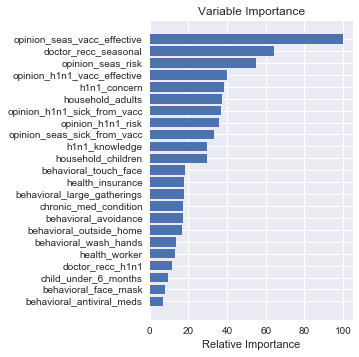

In [29]:
# Fit regression model

clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train_scaled, y_train)
train_score=clf.score(X_train_scaled,y_train)
test_score=clf.score(X_test_scaled,y_test)
print("Train score: %.4f" % train_score)
print("Test score: %.4f" % test_score)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(featureList)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.savefig(os.path.join(os.getcwd(), 'Random-Forrest_Feature-Selection_Seasonal.png'), bbox_inches='tight')
plt.show()